<a href="https://colab.research.google.com/github/zlximon/Tensorflow_DL/blob/master/Fruits_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# download the helper functions
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
#import our helper functions 
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir


--2022-07-08 14:54:12--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-07-08 14:54:12 (85.0 MB/s) - ‘helper_functions.py’ saved [10246/10246]



#download Data from kaggle and unzip it 

In [2]:
!pip install -q kaggle

In [3]:
from google.colab import  files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"zlximon","key":"e22a6b507889c4fffce351e292d6ab77"}'}

In [4]:
! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json


In [7]:
!kaggle datasets download -d moltean/fruits

100% 1.28G/1.28G [00:08<00:00, 238MB/s]
100% 1.28G/1.28G [00:08<00:00, 165MB/s]


In [8]:
#unzip data
unzip_data("fruits.zip")

In [9]:
walk_through_dir("ffruits-fruits-360_dataset/fruits-360")

In [10]:
#set test and train directories
train_dir=("/content/fruits-360_dataset/fruits-360/Training")
test_dir=("/content/fruits-360_dataset/fruits-360/Test")

In [11]:
import tensorflow as tf
IMAGE_SIZE=(224,224)

train_data=tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,image_size=IMAGE_SIZE, label_mode="categorical",batch_size=32)
test_data=tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,image_size=IMAGE_SIZE,label_mode="categorical",batch_size=32)

Found 67692 files belonging to 131 classes.
Found 22688 files belonging to 131 classes.


In [26]:
#our dataset class names 
class_names=train_data.class_names
total_classes=len(train_data.class_names)
total_classes,train_data.class_names

(131,
 ['Apple Braeburn',
  'Apple Crimson Snow',
  'Apple Golden 1',
  'Apple Golden 2',
  'Apple Golden 3',
  'Apple Granny Smith',
  'Apple Pink Lady',
  'Apple Red 1',
  'Apple Red 2',
  'Apple Red 3',
  'Apple Red Delicious',
  'Apple Red Yellow 1',
  'Apple Red Yellow 2',
  'Apricot',
  'Avocado',
  'Avocado ripe',
  'Banana',
  'Banana Lady Finger',
  'Banana Red',
  'Beetroot',
  'Blueberry',
  'Cactus fruit',
  'Cantaloupe 1',
  'Cantaloupe 2',
  'Carambula',
  'Cauliflower',
  'Cherry 1',
  'Cherry 2',
  'Cherry Rainier',
  'Cherry Wax Black',
  'Cherry Wax Red',
  'Cherry Wax Yellow',
  'Chestnut',
  'Clementine',
  'Cocos',
  'Corn',
  'Corn Husk',
  'Cucumber Ripe',
  'Cucumber Ripe 2',
  'Dates',
  'Eggplant',
  'Fig',
  'Ginger Root',
  'Granadilla',
  'Grape Blue',
  'Grape Pink',
  'Grape White',
  'Grape White 2',
  'Grape White 3',
  'Grape White 4',
  'Grapefruit Pink',
  'Grapefruit White',
  'Guava',
  'Hazelnut',
  'Huckleberry',
  'Kaki',
  'Kiwi',
  'Kohlrabi',

In [61]:
#create model with Functional API
from tensorflow.keras import layers
inputs=layers.Input(shape=(224,224,3),name="model1")
x=layers.Conv2D(10,3,activation="relu")(inputs)
x=layers.MaxPool2D()(x)
x=layers.Conv2D(10,3,activation="relu")(x)
x=layers.MaxPool2D()(x)
x=layers.Conv2D(10,3,activation="relu")(x)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
outputs=layers.Dense(total_classes,activation="softmax")(x)
model1=tf.keras.Model(inputs,outputs)

In [14]:
#check our model summar()
model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model1 (InputLayer)         [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 10)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 10)        910   

In [62]:
model1.compile(loss=tf.keras.losses.binary_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

In [63]:
#fit our model
model1_history=model1.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=test_data,validation_steps=(0.25*len(test_data)))

Epoch 1/5
2116/2116 [==============================] - 83s 39ms/step - loss: 0.0594 - accuracy: 0.1234 - val_loss: 0.0305 - val_accuracy: 0.2618
Epoch 2/5
2116/2116 [==============================] - 81s 38ms/step - loss: 0.0274 - accuracy: 0.4166 - val_loss: 0.0237 - val_accuracy: 0.5416
Epoch 3/5
2116/2116 [==============================] - 82s 38ms/step - loss: 0.0192 - accuracy: 0.6931 - val_loss: 0.0182 - val_accuracy: 0.7138
Epoch 4/5
2116/2116 [==============================] - 83s 39ms/step - loss: 0.0151 - accuracy: 0.7994 - val_loss: 0.0134 - val_accuracy: 0.8179
Epoch 5/5
2116/2116 [==============================] - 82s 39ms/step - loss: 0.0110 - accuracy: 0.8764 - val_loss: 0.0126 - val_accuracy: 0.8325


In [64]:
model1.evaluate(test_data)

709/709 [==============================] - 22s 30ms/step - loss: 0.0130 - accuracy: 0.8191


[0.012996782548725605, 0.8191114068031311]

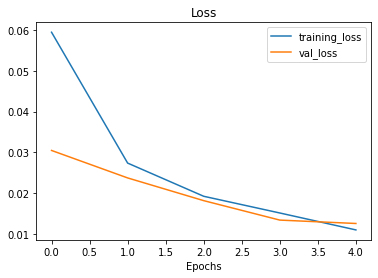

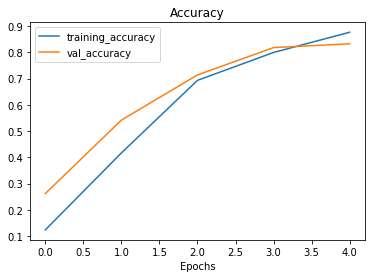

In [65]:
plot_loss_curves(model1_history)

In [66]:
def load_and_prep_image(filename, img_shape=224, scale=True):
 
  # Read in the image
  img = tf.io.read_file(filename)

  # Decode image into tensor
  img = tf.io.decode_image(img, channels=3)

  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])

  # Scale? Yes/no
  if scale:
    # rescale the image (get all values between 0 and 1)
    return img/255.
  else:
    return img # don't need to rescale images for EfficientNet models in TensorFlow

In [67]:
import matplotlib.pyplot as plt

IMG_NAME="/content/ava2.jpg"

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 223.5, 223.5, -0.5)

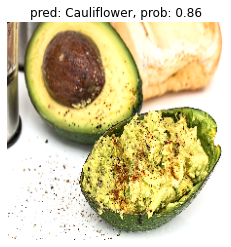

In [68]:
IMG_NAME = load_and_prep_image(IMG_NAME, scale=False) # don't need to scale for our EfficientNetB0 model
pred_prob = model1.predict(tf.expand_dims(IMG_NAME, axis=0)) # make prediction on image with shape [1, 224, 224, 3] (same shape as model was trained on)
pred_class = class_names[pred_prob.argmax()] # get the index with the highet prediction probability
# Plot the appropriate information
plt.figure()
plt.imshow(IMG_NAME/225.)
plt.title(f"pred: {pred_class}, prob: {pred_prob.max():.2f}")
plt.axis(False)